<a href="https://colab.research.google.com/github/Rohit-515/blank-app/blob/main/Qwen_VL_2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!apt -y install -qq aria2

!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/4bit/Qwen2-VL-2B-Instruct/raw/main/chat_template.json -d /content/Qwen2-VL-2B-Instruct -o chat_template.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/4bit/Qwen2-VL-2B-Instruct/raw/main/config.json -d /content/Qwen2-VL-2B-Instruct -o config.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/4bit/Qwen2-VL-2B-Instruct/raw/main/generation_config.json -d /content/Qwen2-VL-2B-Instruct -o generation_config.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/4bit/Qwen2-VL-2B-Instruct/raw/main/merges.txt -d /content/Qwen2-VL-2B-Instruct -o merges.txt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/4bit/Qwen2-VL-2B-Instruct/resolve/main/model-00001-of-00002.safetensors -d /content/Qwen2-VL-2B-Instruct -o model-00001-of-00002.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/4bit/Qwen2-VL-2B-Instruct/resolve/main/model-00002-of-00002.safetensors -d /content/Qwen2-VL-2B-Instruct -o model-00002-of-00002.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/4bit/Qwen2-VL-2B-Instruct/raw/main/model.safetensors.index.json -d /content/Qwen2-VL-2B-Instruct -o model.safetensors.index.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/4bit/Qwen2-VL-2B-Instruct/raw/main/preprocessor_config.json -d /content/Qwen2-VL-2B-Instruct -o preprocessor_config.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/4bit/Qwen2-VL-2B-Instruct/raw/main/tokenizer.json -d /content/Qwen2-VL-2B-Instruct -o tokenizer.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/4bit/Qwen2-VL-2B-Instruct/raw/main/tokenizer_config.json -d /content/Qwen2-VL-2B-Instruct -o tokenizer_config.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/4bit/Qwen2-VL-2B-Instruct/raw/main/vocab.json -d /content/Qwen2-VL-2B-Instruct -o vocab.json

!pip install git+https://github.com/huggingface/transformers transformers-stream-generator==0.0.5 gradio==4.42.0 qwen-vl-utils==0.0.2 bitsandbytes==0.43.3
!pip install flash-attn --no-build-isolation


aria2 is already the newest version (1.36.0-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.

Download Results:
gid   |stat|avg speed  |path/URI
======+====+===========+=======================================================
2493d4|OK  |       0B/s|/content/Qwen2-VL-2B-Instruct/chat_template.json

Status Legend:
(OK):download completed.

Download Results:
gid   |stat|avg speed  |path/URI
======+====+===========+=======================================================
d5c9b9|OK  |       0B/s|/content/Qwen2-VL-2B-Instruct/config.json

Status Legend:
(OK):download completed.

Download Results:
gid   |stat|avg speed  |path/URI
======+====+===========+=======================================================
1657f4|OK  |       0B/s|/content/Qwen2-VL-2B-Instruct/generation_config.json

Status Legend:
(OK):download completed.

Download Results:
gid   |stat|avg speed  |path/URI
======+====+===========+=======================================================
b6055d|OK  |       0B

In [11]:
!pip install --upgrade byaldi

  Using cached ninja-1.11.1.1-py2.py3-none-manylinux1_x86_64.manylinux_2_5_x86_64.whl.metadata (5.3 kB)
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.9/517.9 kB 16.4 MB/s eta 0:00:00
Using cached ninja-1.11.1.1-py2.py3-none-manylinux1_x86_64.manylinux_2_5_x86_64.whl (307 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.6 MB/s eta 0:00:00
  Created wheel for gputil: filenam

In [2]:
from PIL import Image
import requests
import torch
import tensorflow as tf
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from qwen_vl_utils import process_vision_info

In [6]:
# default: Load the model on the available device(s)
model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-2B-Instruct", torch_dtype="auto", device_map="auto"
).to("cuda") # Move the model to the GPU

# We recommend enabling flash_attention_2 for better acceleration and memory saving, especially in multi-image and video scenarios.
# model = Qwen2VLForConditionalGeneration.from_pretrained(
#     "Qwen/Qwen2-VL-2B-Instruct",
#     torch_dtype=torch.bfloat16,
#     attn_implementation="flash_attention_2",
#     device_map="auto",
# ).to("cuda") # Move the model to the GPU

# default processer
processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-2B-Instruct")

# The default range for the number of visual tokens per image in the model is 4-16384. You can set min_pixels and max_pixels according to your needs, such as a token count range of 256-1280, to balance speed and memory usage.
# min_pixels = 256*28*28
# max_pixels = 1280*28*28
# processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-2B-Instruct", min_pixels=min_pixels, max_pixels=max_pixels)

Unrecognized keys in `rope_scaling` for 'rope_type'='default': {'mrope_section'}


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

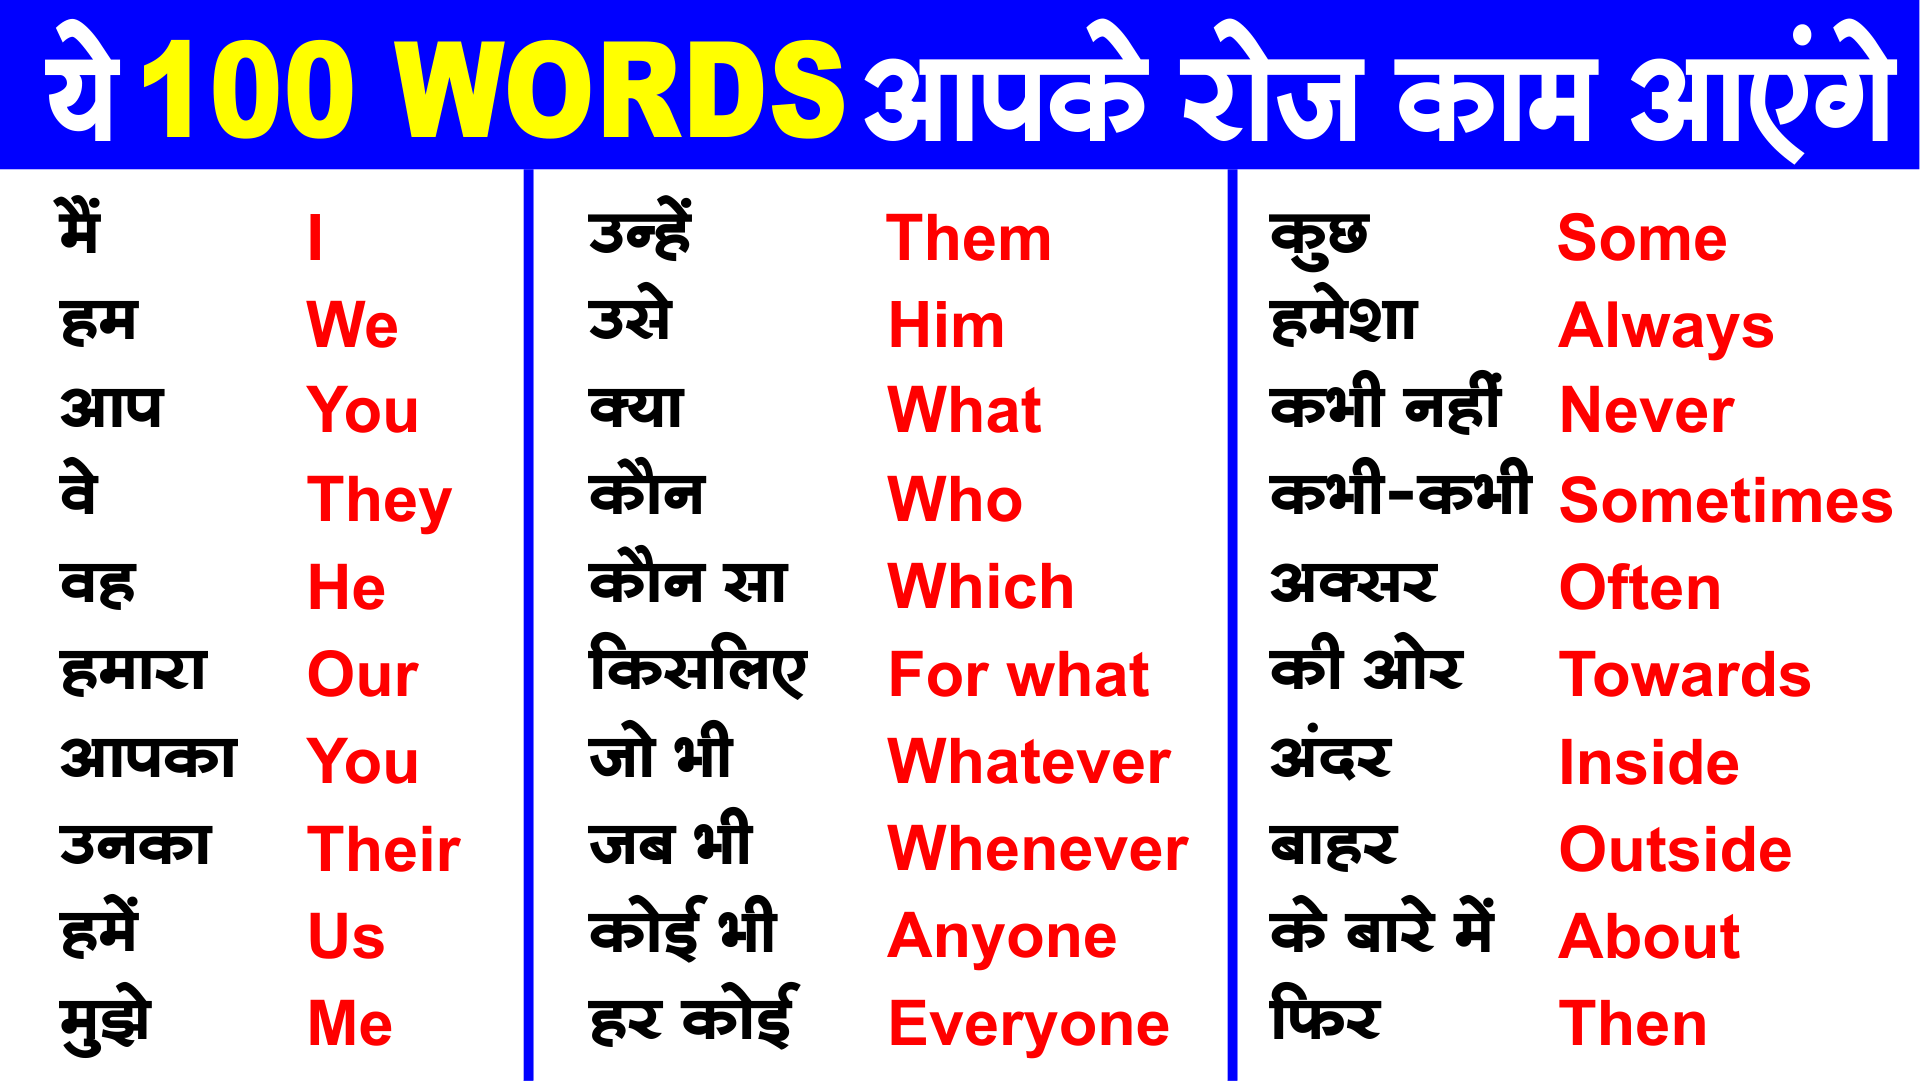

In [3]:
image = Image.open("/content/100-english-words-with-hindi-meaning-Word-Meaning-English-Vocabulary.png")
image

In [8]:
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": "/content/100-english-words-with-hindi-meaning-Word-Meaning-English-Vocabulary.png",
            },
            {"type": "text", "text": "Describe this image"},
        ],
    }
]

# Preparation for inference
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [9]:
# Inference: Generation of the output
generated_ids = model.generate(**inputs, max_new_tokens=1024)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)

In [10]:
print(output_text)

['The image is a list of 100 words in the Nepali language, along with their corresponding pronouns. The list is divided into three columns, each containing a different pronoun:\n\n1. **I** - "मैं"\n2. **We** - "मैं हम"\n3. **You** - "मैं आप"\n4. **They** - "मैं वे"\n5. **He** - "मैं वह"\n6. **Our** - "मैं हमारा"\n7. **You** - "मैं आपका"\n8. **Their** - "मैं उनका"\n9. **Us** - "मैं हमें"\n10. **Them** - "मैं तुम्हें"\n11. **Him** - "मैं हमेशा"\n12. **Them** - "मैं कुछ"\n13. **Who** - "मैं कभी-कभी"\n14. **Which** - "मैं कौन सा"\n15. **For what** - "मैं किसलिए"\n16. **Whatever** - "मैं जो भी"\n17. **Whenever** - "मैं जब भी"\n18. **Anyone** - "मैं कोई भी"\n19. **Everyone** - "मैं हर कोई"\n20. **Some** - "मैं सुझे"\n21. **Always** - "मैं अल्मस"\n22. **Never** - "मैं नहीं"\n23. **Sometimes** - "मैं कभी-कभी"\n24. **Often** - "मैं की ओर"\n25. **Towards** - "मैं तो उत्तर"\n26. **Inside** - "मैं अंदर"\n27. **Outside** - "मैं बाहर"\n28. **About** - "मैं के बारे में"\n29. **Then** - "मैं तरह"\n\nT